<a href="https://colab.research.google.com/github/engymasoud2/GrooveMate/blob/main/StudentSuccess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




data url: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [ ]:
#Here are a set of libraries we imported to complete this assignment.
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold



from matplotlib import pyplot
import itertools

%matplotlib inline

import random

!pip install ucimlrepo

random.seed(42)

In [ ]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)

    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
def load_student_data(student_data):
    csv_path = os.path.join(student_data, "data.csv")
    return pd.read_csv(csv_path, sep=';')

import os
DATASET_PATH = os.path.join(".")
student_data = load_student_data(DATASET_PATH)
student_data.head(35)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [ ]:
student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
student_data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
student_data['Target_Encoded'] = label_encoder.fit_transform(student_data['Target'])
print("Label Encoded DataFrame:")
student_data.head()


Label Encoded DataFrame:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_Encoded
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2


,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


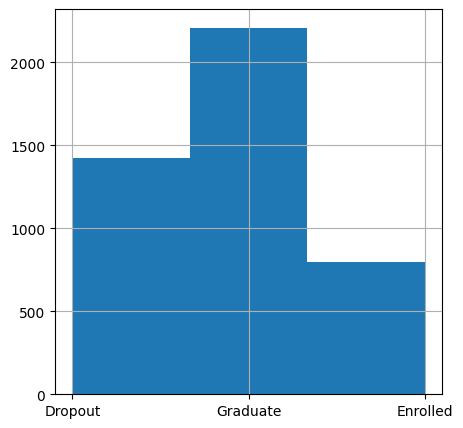

In [ ]:
student_data['Target'].hist(bins=3, figsize=(5,5))
student_data['Target'].value_counts()

In [ ]:
student_data = student_data.drop('Target', axis=1)

In [ ]:
df = pd.DataFrame(student_data)
mean_of_features = df.mean()

print(mean_of_features)

Marital status                                       1.178571
Application mode                                    18.669078
Application order                                    1.727848
Course                                            8856.642631
Daytime/evening attendance\t                         0.890823
Previous qualification                               4.577758
Previous qualification (grade)                     132.613314
Nacionality                                          1.873192
Mother's qualification                              19.561935
Father's qualification                              22.275316
Mother's occupation                                 10.960895
Father's occupation                                 11.032324
Admission grade                                    126.978119
Displaced                                            0.548373
Educational special needs                            0.011528
Debtor                                               0.113698
Tuition 

In [ ]:
df = pd.DataFrame(student_data)
median_of_features = df.median()

print(median_of_features)

Marital status                                       1.000000
Application mode                                    17.000000
Application order                                    1.000000
Course                                            9238.000000
Daytime/evening attendance\t                         1.000000
Previous qualification                               1.000000
Previous qualification (grade)                     133.100000
Nacionality                                          1.000000
Mother's qualification                              19.000000
Father's qualification                              19.000000
Mother's occupation                                  5.000000
Father's occupation                                  7.000000
Admission grade                                    126.100000
Displaced                                            1.000000
Educational special needs                            0.000000
Debtor                                               0.000000
Tuition 

In [ ]:
df = pd.DataFrame(student_data)
var_of_features = df.var()

print(var_of_features)

Marital status                                    3.669294e-01
Application mode                                  3.057141e+02
Application order                                 1.726052e+00
Course                                            4.258306e+06
Daytime/evening attendance\t                      9.727954e-02
Previous qualification                            1.043788e+02
Previous qualification (grade)                    1.739321e+02
Nacionality                                       4.781050e+01
Mother's qualification                            2.434594e+02
Father's qualification                            2.354110e+02
Mother's occupation                               6.979241e+02
Father's occupation                               6.382212e+02
Admission grade                                   2.097283e+02
Displaced                                         2.477161e-01
Educational special needs                         1.139771e-02
Debtor                                            1.007

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


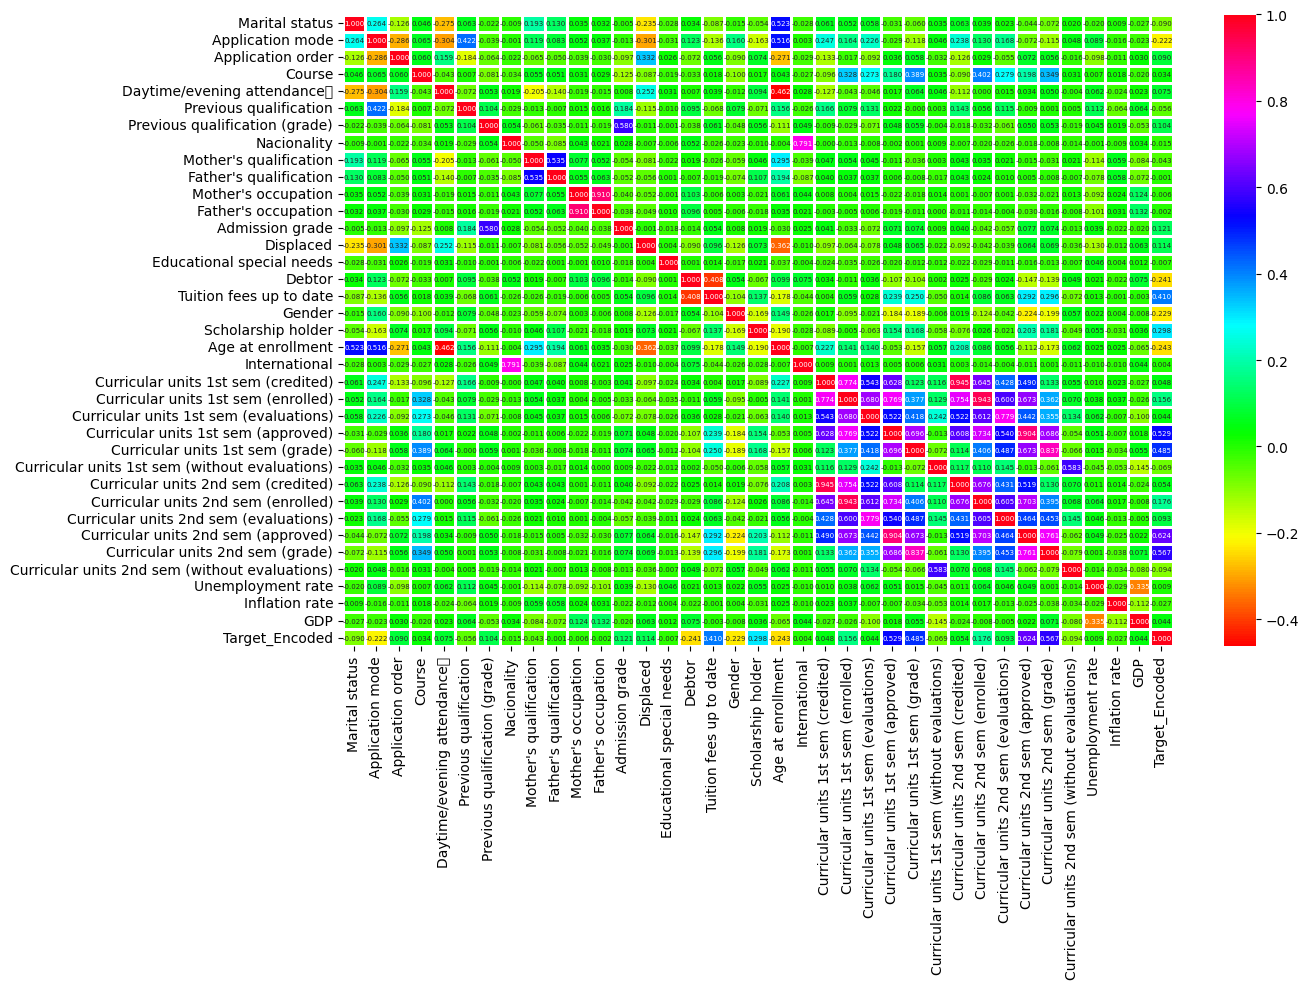

In [ ]:
data_corr = student_data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(14,10))
sns.heatmap(data_corr,annot=True,cmap='hsv',fmt='.3f',linewidths=2, annot_kws={"size": 5})
plt.tight_layout()
plt.show()

Saving figure attribute_histogram_plots


/tmp/ipython-input-209415998.py:6: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-209415998.py:7: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(path, format=fig_extension, dpi=resolution)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


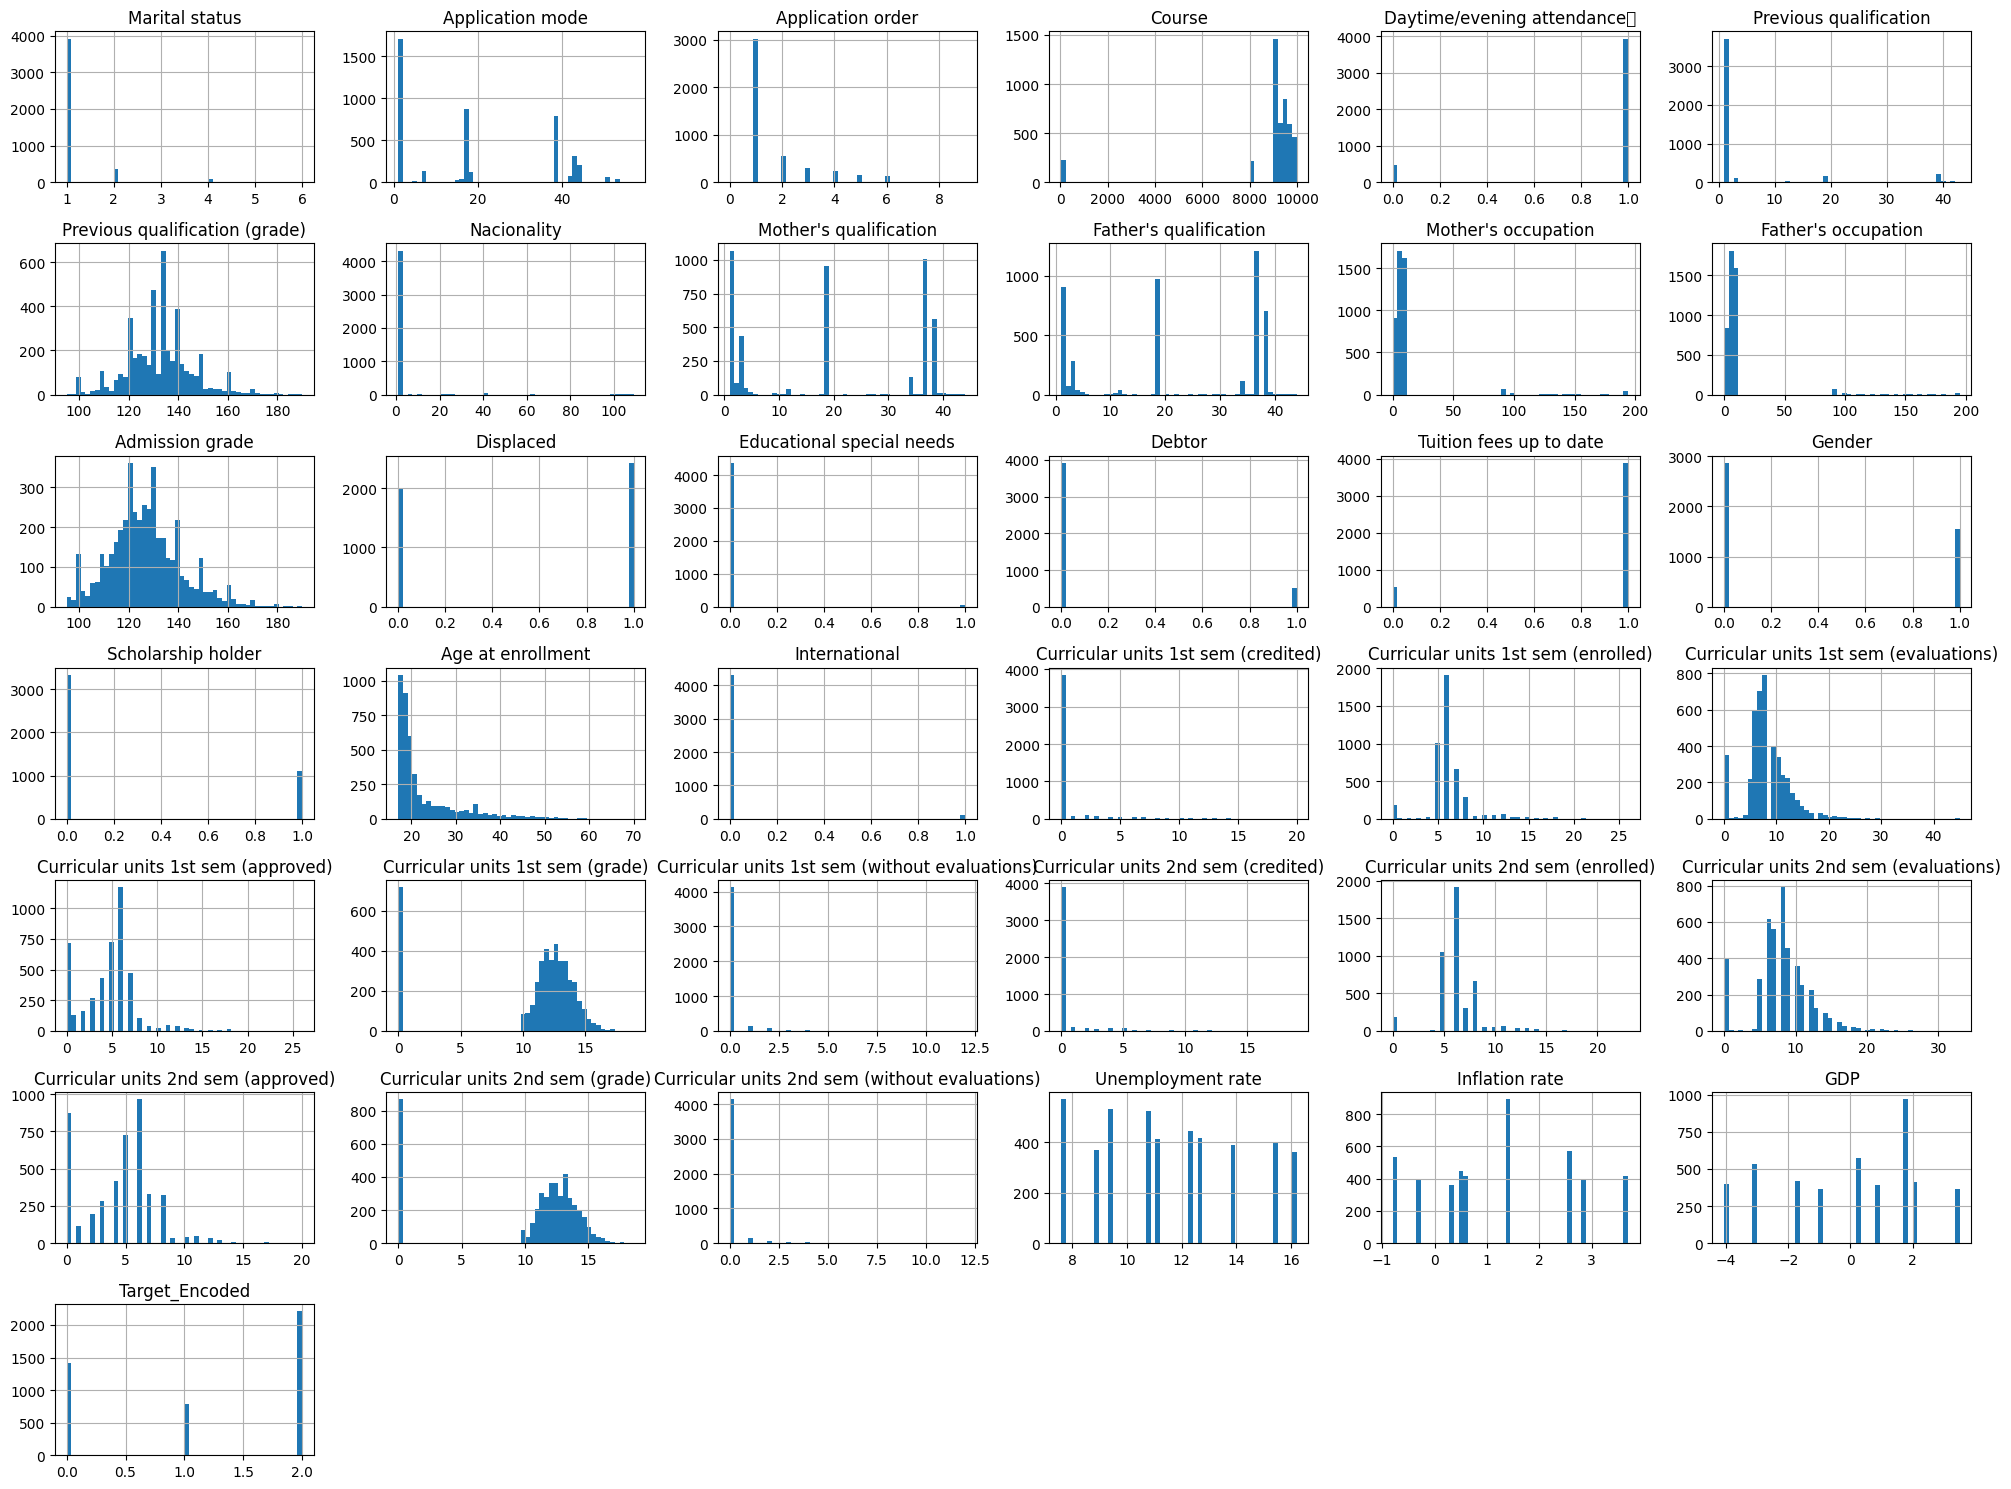

In [ ]:
student_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
student_data["hasBoth"] = "0"

In [ ]:
student_data["hasBoth"] = (
    (student_data["Scholarship holder"] == 1) &
    (student_data["Tuition fees up to date"] == 1)
).astype(int)

In [ ]:
for col in student_data:
  student_data[col] = student_data[col].astype(int)

,count
Tuition fees up to date,
1,3896
0,528


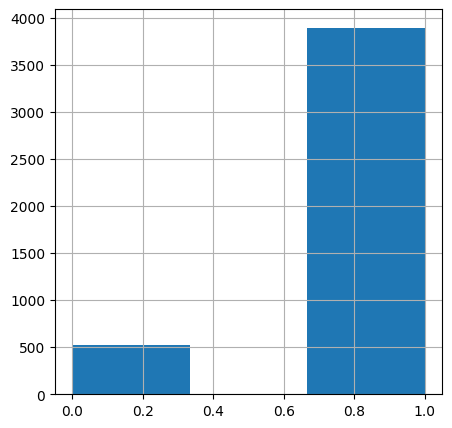

In [ ]:
student_data['Tuition fees up to date'].hist(bins=3, figsize=(5,5))
student_data['Tuition fees up to date'].value_counts()

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


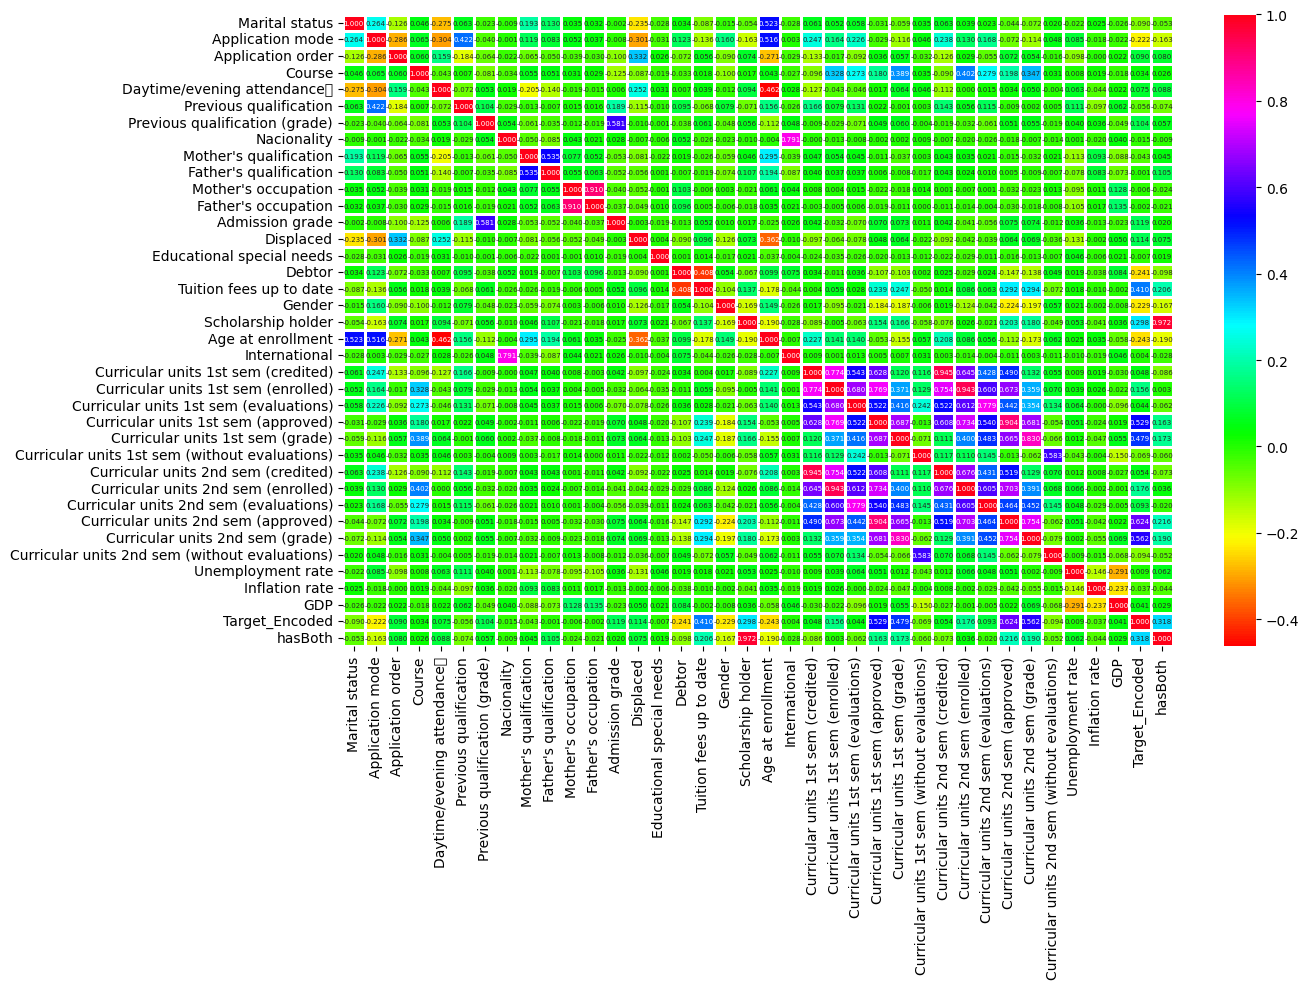

In [ ]:
data_corr = student_data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(14,10))
sns.heatmap(data_corr,annot=True,cmap='hsv',fmt='.3f',linewidths=2, annot_kws={"size": 5})
plt.tight_layout()
plt.show()

In [ ]:
selected_columns = ['Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)', 'Tuition fees up to date', 'hasBoth', 'Target_Encoded']
workingFeatures = student_data[selected_columns].copy()


In [ ]:
workingFeatures.head()

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (approved),Tuition fees up to date,hasBoth,Target_Encoded
0,0,0,0,0,1,0,0
1,13,6,14,6,0,0,2
2,0,0,0,0,0,0,0
3,12,5,13,6,1,0,2
4,13,6,12,5,1,0,2


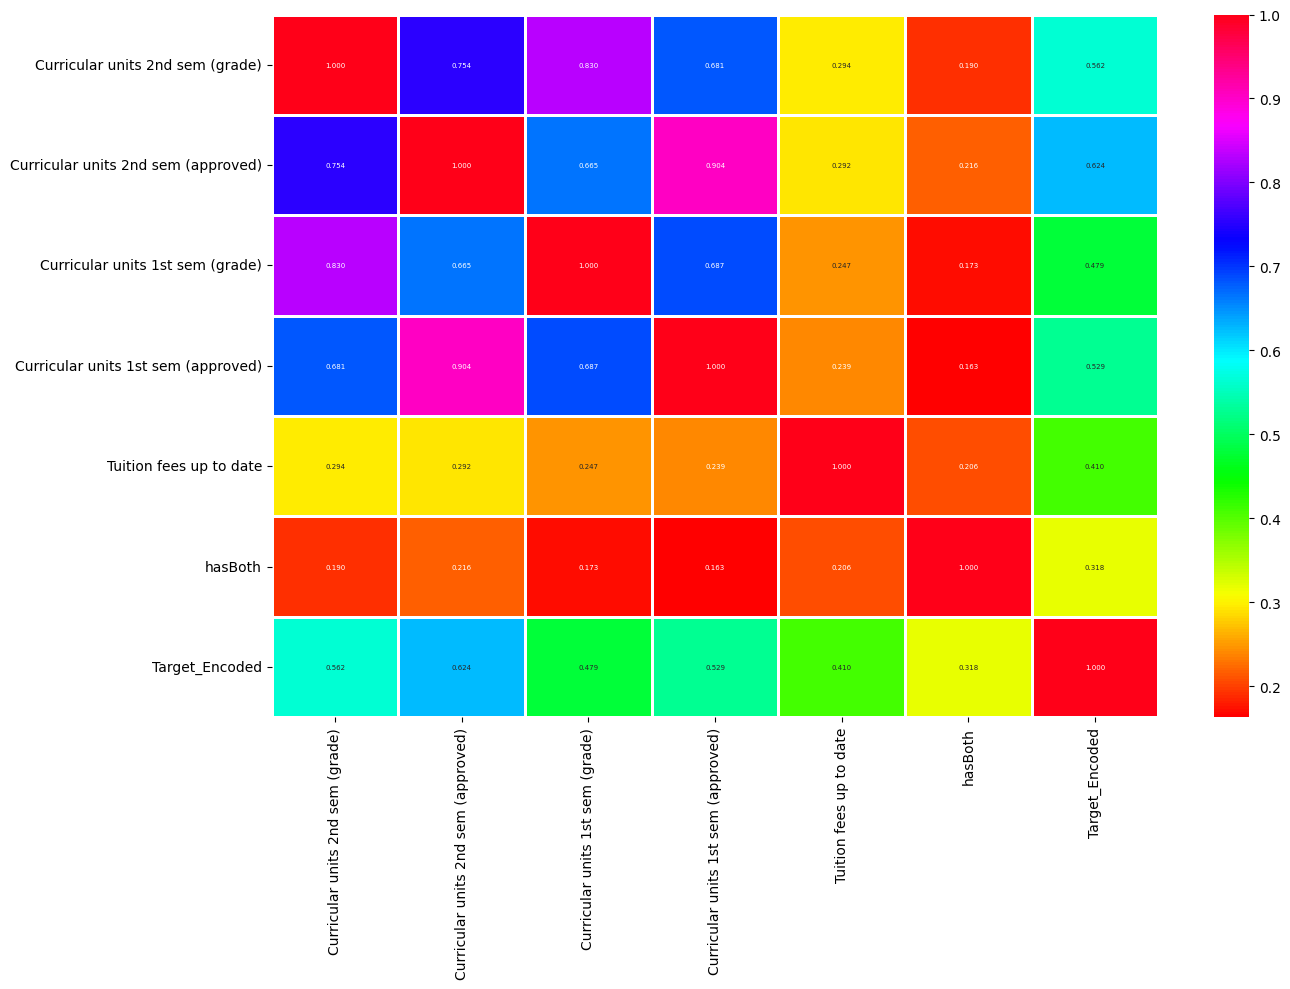

In [ ]:
data_corr = workingFeatures.select_dtypes(include=['number']).corr()

plt.figure(figsize=(14,10))
sns.heatmap(data_corr,annot=True,cmap='hsv',fmt='.3f',linewidths=2, annot_kws={"size": 5})
plt.tight_layout()
plt.show()

In [ ]:
#previous Linear model prior to revision
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

X = workingFeatures[['Curricular units 2nd sem (grade)',
                     'Curricular units 2nd sem (approved)',
                     'Curricular units 1st sem (grade)',
                     'Curricular units 1st sem (approved)',
                     'Tuition fees up to date',
                     'hasBoth']]

y = workingFeatures['Target_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=500, multi_class='multinomial', solver='sag')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("F1 (macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 (weighted):", f1_score(y_test, y_pred, average='weighted'))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6689265536723163
F1 (macro): 0.6309902503935877
F1 (weighted): 0.6881049921403682
Confusion Matrix:
 [[194  87  35]
 [ 17  84  50]
 [ 16  88 314]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report

X = workingFeatures[['Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)', 'Tuition fees up to date', 'hasBoth']]
y = workingFeatures['Target_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7242937853107345
F1 Score: 0.6895461336278508
Confusion Matrix:
 [[225  18  73]
 [ 33  23  95]
 [ 20   5 393]]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split

class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


X = workingFeatures[['Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)', 'Tuition fees up to date', 'hasBoth']]
y = workingFeatures['Target_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_dataset = TabularDataset(X_train, y_train)
test_dataset = TabularDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # for evaluation


class SimpleFNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]
num_classes = len(workingFeatures['Target_Encoded'].unique())

model = SimpleFNN(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

y_pred = np.array(all_preds)
y_test = np.array(all_labels)

accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 (macro):", f1_macro)
print("F1 (weighted):", f1_weighted)
print("Confusion Matrix:\n", cm)


Accuracy: 0.711864406779661
F1 (macro): 0.6018916010862406
F1 (weighted): 0.686038378731384
Confusion Matrix:
 [[214  25  77]
 [ 34  30  87]
 [ 17  15 386]]


In [ ]:

X_s = workingFeatures[['Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)', 'Tuition fees up to date', 'hasBoth']]
y_s = workingFeatures['Target_Encoded']
#Stratefied Split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42, stratify=y_s)
model_s = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500)
model_s.fit(X_train_s, y_train_s)
y_pred_s = model_s.predict(X_test_s)

accuracy_s = accuracy_score(y_test_s, y_pred_s)
print("Accuracy:", accuracy_s)

f1_s = f1_score(y_test_s, y_pred_s, average='weighted')
print("F1 Score:", f1_s)

print("Confusion Matrix:\n", confusion_matrix(y_test_s, y_pred_s))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7220338983050848
F1 Score: 0.6810532600488546
Confusion Matrix:
 [[202  27  55]
 [ 47  19  93]
 [ 21   3 418]]


In [ ]:
print("Overall proportions:\n", y_s.value_counts(normalize=True).sort_index())
print("\nNon-strat test proportions:\n", y_test.value_counts(normalize=True).sort_index())
print("\nStrat test proportions:\n", y_test_s.value_counts(normalize=True).sort_index())


Overall proportions:
 Target_Encoded
0    0.321203
1    0.179476
2    0.499322
Name: proportion, dtype: float64

Non-strat test proportions:
 Target_Encoded
0    0.357062
1    0.170621
2    0.472316
Name: proportion, dtype: float64

Strat test proportions:
 Target_Encoded
0    0.320904
1    0.179661
2    0.499435
Name: proportion, dtype: float64


In [ ]:
print("F1 macro:", f1_score(y_test_s, y_pred_s, average="macro"))
print("F1 weighted:", f1_score(y_test_s, y_pred_s, average="weighted"))
print(classification_report(y_test_s, y_pred_s, digits=4))

F1 macro: 0.5804330881045683
F1 weighted: 0.6810532600488546
              precision    recall  f1-score   support

           0     0.7481    0.7113    0.7292       284
           1     0.3878    0.1195    0.1827       159
           2     0.7385    0.9457    0.8294       442

    accuracy                         0.7220       885
   macro avg     0.6248    0.5922    0.5804       885
weighted avg     0.6786    0.7220    0.6811       885

